In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline
import pydotplus
from IPython.display import Image
import collections
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import chi2_contingency
import re
import datetime as dt
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from   statsmodels.formula.api import OLS
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from  sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA

C:\Users\sumit\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
df = pd.read_excel('C:/Users/sumit/Sumit DATA/datasets/Project/Cleandata7.xlsx')

In [3]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,agreeableness,extraversion,nueroticism,openess_to_experience,Aggregate Mean Marks,Aggregate Max Marks,Aggregate Min Marks,GAP_after_Grad,GAP_in_Grad,Age
0,203097,420000,2012-06-01,2015-12-31,senior quality engineer,bangalore,Female,1990-02-19,84.3,State Board,...,0.8128,0.5269,1.35490,-0.4455,445.0,445,445,1,0,25
1,579905,500000,2013-09-01,2015-12-31,assistant manager,indore,Male,1989-10-04,85.4,CBSE,...,0.3789,1.2396,-0.10760,0.8637,466.0,466,466,1,1,26
2,810601,325000,2014-06-01,2015-12-31,systems engineer,chennai,Female,1992-08-03,85.0,CBSE,...,1.7109,0.1637,-0.86820,0.6721,395.0,395,395,0,0,23
3,267447,1100000,2011-07-01,2015-12-31,senior software engineer,gurgaon,Male,1989-12-05,85.6,CBSE,...,0.3448,-0.3440,-0.40780,-0.9194,615.0,615,615,0,0,26
4,343523,200000,2014-03-01,2015-03-01,get,manesar,Male,1991-02-27,78.0,CBSE,...,-0.2793,-1.0697,0.09163,-0.1295,233.0,233,233,2,0,24


In [4]:
from scipy import stats
import numpy as np
df = df[(np.abs(stats.zscore(df['Salary'])) < 3)]

In [5]:
df.reset_index(drop = True,inplace=True)

In [6]:
df.shape

(3939, 44)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3939 entries, 0 to 3938
Data columns (total 44 columns):
ID                       3939 non-null int64
Salary                   3939 non-null int64
DOJ                      3939 non-null datetime64[ns]
DOL                      3939 non-null datetime64[ns]
Designation              3939 non-null object
JobCity                  3483 non-null object
Gender                   3939 non-null object
DOB                      3939 non-null datetime64[ns]
10percentage             3939 non-null float64
10board                  3939 non-null object
12graduation             3939 non-null int64
12percentage             3939 non-null float64
12board                  3939 non-null object
CollegeID                3939 non-null int64
CollegeTier              3939 non-null object
Degree                   3939 non-null object
Specialization           3939 non-null object
collegeGPA               3939 non-null float64
CollegeCityID            3939 non-null int

In [8]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Aggregate Mean Marks', 'Aggregate Max Marks', 'Aggregate Min Marks',
       'GAP_after_Grad', 'GAP_in_Grad', 'Age'],
      dtype='object')

In [9]:
df.head().T

,0,1,2,3,4
ID,203097,579905,810601,343523,1027655
Salary,420000,500000,325000,200000,300000
DOJ,2012-06-01 00:00:00,2013-09-01 00:00:00,2014-06-01 00:00:00,2014-03-01 00:00:00,2014-06-01 00:00:00
DOL,2015-12-31 00:00:00,2015-12-31 00:00:00,2015-12-31 00:00:00,2015-03-01 00:00:00,2015-12-31 00:00:00
Designation,senior quality engineer,assistant manager,systems engineer,get,system engineer
JobCity,bangalore,indore,chennai,manesar,hyderabad
Gender,Female,Male,Female,Male,Male
DOB,1990-02-19 00:00:00,1989-10-04 00:00:00,1992-08-03 00:00:00,1991-02-27 00:00:00,1992-07-02 00:00:00
10percentage,84.3,85.4,85,78,89.92
10board,State Board,CBSE,CBSE,CBSE,State Board


In [10]:
df = df.drop(['ID', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'DOB', 'CollegeID', 'CollegeCityID', 'CollegeCityTier',
       'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg','GAP_after_Grad'],axis=1)

In [11]:
df.groupby('12graduation').count()['Salary']

12graduation
2003      24
2004      68
2005     155
2006     399
2007     521
2008     932
2009    1047
2010     738
2011      44
2012      10
2013       1
Name: Salary, dtype: int64

In [12]:
df['12graduation'].unique()

array([2007, 2010, 2008, 2009, 2006, 2011, 2005, 2004, 2012, 2003, 2013],
      dtype=int64)

In [13]:
df.head().T

,0,1,2,3,4
Salary,420000,500000,325000,200000,300000
Gender,Female,Male,Female,Male,Male
10percentage,84.3,85.4,85,78,89.92
10board,State Board,CBSE,CBSE,CBSE,State Board
12graduation,2007,2007,2010,2008,2010
12percentage,95.8,85,68.2,76.8,87
12board,State Board,CBSE,CBSE,CBSE,State Board
CollegeTier,Average College,Average College,Average College,Average College,Average College
Degree,B.Tech/B.E.,B.Tech/B.E.,B.Tech/B.E.,B.Tech/B.E.,B.Tech/B.E.
Specialization,computer engineering,electronics and communication engineering,information technology,electronics and communication engineering,electronics and communication engineering


In [14]:
from sklearn.preprocessing import LabelEncoder
gender_label = LabelEncoder()
df['Gender'] = gender_label.fit_transform(df['Gender'])
per10 = LabelEncoder()
df['10board'] = per10.fit_transform(df['10board'])
per12 = LabelEncoder()
df['12board'] = per12.fit_transform(df['12board'])
deg = LabelEncoder()
df['Degree'] = deg.fit_transform(df['Degree'])
sep = LabelEncoder()
df['Specialization'] = sep.fit_transform(df['Specialization'])
colgpa = LabelEncoder()
df['CollegeState'] = colgpa.fit_transform(df['CollegeState'])
wegrad = LabelEncoder()
df['12graduation'] = wegrad.fit_transform(df['12graduation'])
wegradqw = LabelEncoder()
df['GraduationYear'] = wegradqw.fit_transform(df['GraduationYear'])
qwerty = LabelEncoder()
df['CollegeTier'] = qwerty.fit_transform(df['CollegeTier'])

# Modelling

In [15]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938
Salary,420000.000000,500000.000000,325000.000000,200000.000000,300000.0000,300000.000000,400000.000000,600000.000000,230000.000000,600000.000000,...,200000.000000,300000.000000,480000.000000,630000.000000,800000.000000,280000.000000,100000.00000,320000.000000,200000.000000,400000.000000
Gender,0.000000,1.000000,0.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.00000,1.000000,0.000000,0.000000
10percentage,84.300000,85.400000,85.000000,78.000000,89.9200,86.080000,92.000000,90.000000,77.000000,88.600000,...,74.400000,74.880000,88.000000,80.000000,73.000000,52.090000,90.00000,81.860000,78.720000,70.600000
10board,2.000000,0.000000,0.000000,0.000000,2.0000,2.000000,0.000000,0.000000,0.000000,2.000000,...,3.000000,2.000000,3.000000,2.000000,3.000000,0.000000,2.00000,2.000000,2.000000,0.000000
12graduation,4.000000,4.000000,7.000000,5.000000,7.0000,7.000000,7.000000,6.000000,7.000000,3.000000,...,5.000000,7.000000,4.000000,4.000000,5.000000,3.000000,6.00000,5.000000,7.000000,5.000000
12percentage,95.800000,85.000000,68.200000,76.800000,87.0000,67.500000,91.000000,91.200000,72.200000,83.700000,...,53.330000,82.550000,88.000000,70.000000,54.000000,55.500000,93.00000,65.500000,69.880000,68.000000
12board,2.000000,0.000000,0.000000,0.000000,2.0000,2.000000,0.000000,0.000000,0.000000,2.000000,...,3.000000,2.000000,3.000000,2.000000,3.000000,0.000000,2.00000,2.000000,2.000000,0.000000
CollegeTier,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Degree,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Specialization,10.000000,21.000000,33.000000,21.000000,21.0000,13.000000,39.000000,23.000000,21.000000,10.000000,...,32.000000,13.000000,21.000000,20.000000,7.000000,33.000000,21.00000,10.000000,13.000000,33.000000


In [152]:
x = df[['Gender', '12graduation', '12board', 'CollegeTier', 'Degree',
       'CollegeState', 'GraduationYear','GAP_in_Grad','Age', 'Logical','Quant', 'Domain','English','Aggregate Mean Marks',
         '10percentage','12percentage','collegeGPA','conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']]
y = df[['Salary']]

In [153]:
x.shape

(3939, 22)

In [154]:
x_cont = x[['Age', 'Logical','Quant', 'Domain','English','Aggregate Mean Marks','10percentage','12percentage','collegeGPA','conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience','GAP_in_Grad']]
sc = StandardScaler()
x_cont = sc.fit_transform(x_cont)
pca = PCA(n_components=13)
pca.fit(x_cont)
X_pca = pd.DataFrame(pca.transform(x_cont))

In [155]:
X_pca.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
3934,4.004425,-0.927125,1.078661,-0.380641,-0.088458,-0.159203,0.759414,0.520428,-1.242858,-0.664345,-1.090286,-1.155458,-0.917577
3935,-1.117538,-0.082740,-1.415823,-1.705676,-1.476888,0.304639,-0.022441,-1.290512,0.009452,0.193767,0.122800,-0.342764,-0.756510
3936,1.160045,2.133044,-0.525092,0.158261,1.407066,0.065571,0.426364,0.357353,0.045443,-0.168100,1.246753,-0.231539,0.856643
3937,0.855593,-0.003114,-0.574044,-1.603912,0.804039,-0.223886,0.301146,0.181097,0.900930,0.333446,0.591317,0.164732,0.031042
3938,0.985686,1.286363,0.223503,-0.272755,-0.425659,-1.615363,-0.228374,0.692002,0.359934,-0.038110,-0.187113,0.032178,-0.208057


In [156]:
X_pca.shape

(3939, 13)

In [157]:
pca.components_

array([[ 0.14956085, -0.35535706, -0.3432241 , -0.26724306, -0.31391862,
        -0.27824151, -0.36753942, -0.3449064 , -0.27125528, -0.15402007,
        -0.23556634, -0.09041829,  0.18902512, -0.14107251,  0.12458679],
       [-0.01826224,  0.10742298,  0.15243573,  0.15408062,  0.05532083,
         0.13862745,  0.11419994,  0.13309505,  0.11021024, -0.44602472,
        -0.4669695 , -0.45461061,  0.15581079, -0.47327789, -0.06348841],
       [ 0.41803036,  0.14271435,  0.17102633,  0.42386568,  0.0580426 ,
         0.41986458, -0.29814332, -0.33248108, -0.12062675, -0.05859788,
         0.0587023 ,  0.0186457 , -0.00230101,  0.06561832,  0.43679926],
       [ 0.1831839 ,  0.31691881,  0.29712491, -0.44463044,  0.41265716,
        -0.4370218 ,  0.07782244, -0.06751879, -0.15792816, -0.04559403,
        -0.00565494, -0.09430495, -0.17877646, -0.07001923,  0.36787002],
       [-0.3083441 ,  0.05088017, -0.09636218,  0.07505274,  0.02713458,
         0.11662083, -0.18574448, -0.22050589, 

In [158]:
pca.explained_variance_

array([3.314592  , 2.34589621, 1.77849833, 1.16490066, 1.00960453,
       0.95748034, 0.7078141 , 0.63876642, 0.59190123, 0.55798566,
       0.49355428, 0.46878687, 0.37475583])

In [159]:
pca_var = pca.explained_variance_ratio_
pca_var = pd.DataFrame(pca_var*100)
pca_var.sum()

0    96.005864
dtype: float64

In [160]:
x = x.drop(['Age', 'Logical','Quant', 'Domain','English','Aggregate Mean Marks','10percentage','12percentage','collegeGPA','conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience','GAP_in_Grad'],axis = 1)

In [161]:
x

,Gender,12graduation,12board,CollegeTier,Degree,CollegeState,GraduationYear
0,0,4,2,0,0,0,3
1,1,4,0,0,0,13,4
2,0,7,0,0,0,23,6
3,1,5,0,0,0,23,4
4,1,7,2,0,0,11,6
5,1,7,2,0,0,11,6
6,1,7,0,1,0,20,8
7,1,6,0,1,0,4,5
8,1,7,0,0,0,25,6
9,1,3,2,0,0,13,2


In [162]:
x.shape

(3939, 7)

In [163]:
x['PC1'] = X_pca[0]
x['PC2'] = X_pca[1]
x['PC3'] = X_pca[2]
x['PC4'] = X_pca[3]
x['PC5'] = X_pca[4]
x['PC6'] = X_pca[5]
x['PC7'] = X_pca[6]
x['PC8'] = X_pca[7]
x['PC9'] = X_pca[8]
x['PC10'] = X_pca[9]
x['PC11'] = X_pca[10]
x['PC12'] = X_pca[11]
x['PC13'] = X_pca[12]

In [164]:
x['PC1']

0      -1.760697
1      -2.763014
2      -0.877756
3       0.418832
4      -1.230516
5      -0.079626
6      -2.600090
7      -3.207965
8      -0.531004
9      -1.379802
10     -2.291226
11      1.037198
12      1.696562
13     -0.559453
14      0.719522
15     -1.415922
16     -0.251843
17      0.540731
18     -0.049357
19     -1.182809
20      0.925509
21      0.290428
22      6.110200
23     -2.369878
24     -2.078981
25      0.900518
26     -1.682676
27     -0.337253
28      2.549398
29     -1.302782
          ...   
3909    0.174271
3910    0.352866
3911   -0.770356
3912    0.616572
3913    0.399343
3914   -0.558846
3915    1.546450
3916   -1.482640
3917   -0.183719
3918    3.174160
3919   -1.799094
3920    0.213012
3921    0.341626
3922   -0.069602
3923   -1.810274
3924   -0.300619
3925   -1.407686
3926   -2.827473
3927   -1.642137
3928    1.278810
3929    1.697966
3930   -0.232566
3931   -0.755057
3932    0.958106
3933    1.252953
3934    4.004425
3935   -1.117538
3936    1.1600

In [165]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3939 entries, 0 to 3938
Data columns (total 20 columns):
Gender            3939 non-null int32
12graduation      3939 non-null int64
12board           3939 non-null int32
CollegeTier       3939 non-null int32
Degree            3939 non-null int32
CollegeState      3939 non-null int32
GraduationYear    3939 non-null int64
PC1               3939 non-null float64
PC2               3939 non-null float64
PC3               3939 non-null float64
PC4               3939 non-null float64
PC5               3939 non-null float64
PC6               3939 non-null float64
PC7               3939 non-null float64
PC8               3939 non-null float64
PC9               3939 non-null float64
PC10              3939 non-null float64
PC11              3939 non-null float64
PC12              3939 non-null float64
PC13              3939 non-null float64
dtypes: float64(13), int32(5), int64(2)
memory usage: 538.6 KB


In [166]:
x

,Gender,12graduation,12board,CollegeTier,Degree,CollegeState,GraduationYear,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,0,4,2,0,0,0,3,-1.760697,0.015523,-0.712346,-0.552790,-1.580766,0.224989,0.072411,-0.002733,-0.223797,-0.008864,-1.447242,1.004299,-0.563592
1,1,4,0,0,0,13,4,-2.763014,0.088315,1.770634,1.361068,-1.367664,-0.794691,0.327017,-1.104420,-0.231883,-0.451614,0.189136,-0.641940,0.504706
2,0,7,0,0,0,23,6,-0.877756,-1.588684,-0.756190,0.279501,0.619428,-1.061279,0.370040,0.851595,1.063327,-0.082388,0.735587,0.636532,-0.456007
3,1,5,0,0,0,23,4,0.418832,0.912702,-1.557401,1.587598,-0.282314,-0.421790,-0.390606,1.323930,-0.270934,-0.214746,0.581840,0.829415,0.116980
4,1,7,2,0,0,11,6,-1.230516,2.332763,-1.674797,1.049728,0.704517,0.542577,0.079385,0.797791,-0.069431,1.030806,0.284848,-0.055192,0.194317
5,1,7,2,0,0,11,6,-0.079626,-0.234083,-1.776168,0.244768,2.741392,0.519126,0.236719,0.567795,1.524793,0.597061,-0.554486,-0.093968,0.199908
6,1,7,0,1,0,20,8,-2.600090,-0.372925,0.464457,0.256879,-1.548585,0.979169,-1.011614,-0.783858,1.193794,1.377007,1.162692,0.470572,-0.207236
7,1,6,0,1,0,4,5,-3.207965,1.226098,-0.412742,0.032077,-0.017830,0.514042,-0.037546,0.901466,0.452534,-0.484309,0.309635,1.004151,-0.212965
8,1,7,0,0,0,25,6,-0.531004,1.034116,-0.866494,0.367360,-0.696843,-1.313463,-1.272931,1.290011,0.518754,0.169553,0.745421,-0.241946,-0.579068
9,1,3,2,0,0,13,2,-1.379802,0.095351,0.092452,-0.526818,-0.990645,0.284204,1.241238,0.006624,0.260224,-0.062956,-0.362927,-0.525812,-0.256269


In [167]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

[0.00560046 0.02447813 0.00610266 0.02045102 0.         0.00333099
 0.21917404 0.43016132 0.09395713 0.01712679 0.02267509 0.02548227
 0.0274942  0.01842596 0.01479669 0.00498961 0.0146674  0.01428925
 0.02226918 0.0145278 ]


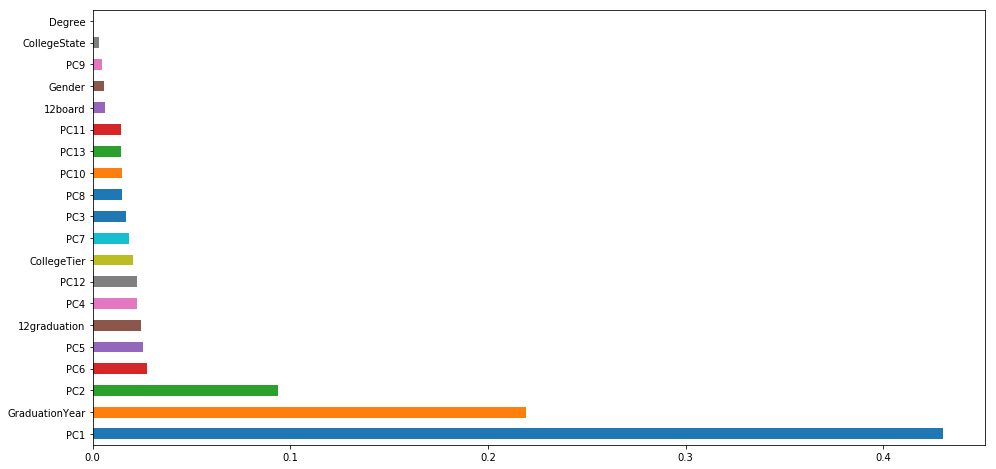

In [168]:
model = RandomForestRegressor(max_depth=5,random_state=0)
model.fit(x_train,y_train)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
plt.figure(figsize=(16,8))
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [169]:
model.score(x_train,y_train)

0.38431320486525133

In [170]:
model.score(x_test,y_test)

0.24625827637729414

In [171]:
x.columns

Index(['Gender', '12graduation', '12board', 'CollegeTier', 'Degree',
       'CollegeState', 'GraduationYear', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5',
       'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'],
      dtype='object')

In [172]:
from statsmodels.formula.api import OLS
result = OLS(y,x)
model = result.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1073.
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:37:30   Log-Likelihood:                -51906.
No. Observations:                3939   AIC:                         1.039e+05
Df Residuals:                    3919   BIC:                         1.040e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Gender          4.584e+04   4945.986      9.267      0.000    3.61e+04    5.55e+04
12graduation     8.18e+04   8178.618     10.002      0.000    6.58e+04    9.78e+04
12board         1.528e+04   2026.909      7.537      0.000    1.13e+04    1.93e+04
CollegeTier     7.271e+04   8483.995      8.570      0.000    5.61e+04    8.93e+04
Degree          2.648e+04   6806.084      3.890      0.000    1.31e+04    3.98e+04
CollegeState    1716.3106    287.045      5.979      0.000    1153.539    2279.083
GraduationYear -4.877e+04   9136.031     -5.338      0.000   -6.67e+04   -3.09e+04
PC1            -1.676e+04   1353.831    -12.383      0.000   -1.94e+04   -1.41e+04
PC2             1.196e+04   1393.143      8.587      0.000    9231.678    1.47e+04
PC3             4.838e+04   2910.525     16.622      0.000    4.27e+04    5.41e+04
PC4             3.184e+04   2971.906     10.712      0.000     2.6e+04    3.77e+04
PC5            -3.922e+04   2152.938    -18.218      0.000   -4.34e+04    -3.5e+04
PC6             4.529e+04   2934.313     15.435      0.000    3.95e+04     5.1e+04
PC7             3.448e+04   3705.432      9.304      0.000    2.72e+04    4.17e+04
PC8            -3682.3763   3805.058     -0.968      0.333   -1.11e+04    3777.703
PC9             -962.9005   3880.259     -0.248      0.804   -8570.417    6644.616
PC10            -1.65e+04   3617.038     -4.562      0.000   -2.36e+04   -9408.863
PC11           -6076.2014   3121.966     -1.946      0.052   -1.22e+04      44.629
PC12           -5452.9803   3179.906     -1.715      0.086   -1.17e+04     781.446
PC13             482.9035   3356.750      0.144      0.886   -6098.238    7064.045
==============================================================================
Omnibus:                      241.746   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              365.708
Skew:                           0.514   Prob(JB):                     3.87e-80
Kurtosis:                       4.082   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
df.columns

Index(['Salary', 'Gender', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeState', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Aggregate Mean Marks',
       'Aggregate Max Marks', 'Aggregate Min Marks', 'GAP_in_Grad', 'Age'],
      dtype='object')

In [174]:
anova_dataf = df
anova_model = ols("Salary~Gender+anova_dataf['12graduation']+anova_dataf['12board']+CollegeTier+Degree+Specialization+CollegeState+GraduationYear",data = anova_dataf).fit()
table = sm.stats.anova_lm(anova_model)
table

,df,sum_sq,mean_sq,F,PR(>F)
Gender,1.0,1.084150e+11,1.084150e+11,6.348757,1.178569e-02
anova_dataf['12graduation'],1.0,2.641418e+12,2.641418e+12,154.680761,7.387045e-35
anova_dataf['12board'],1.0,4.138302e+11,4.138302e+11,24.233786,8.882499e-07
CollegeTier,1.0,3.067968e+12,3.067968e+12,179.659405,4.314348e-40
Degree,1.0,1.194442e+12,1.194442e+12,69.946192,8.362213e-17
Specialization,1.0,4.210796e+10,4.210796e+10,2.465831,1.164266e-01
CollegeState,1.0,3.917566e+11,3.917566e+11,22.941166,1.731958e-06
GraduationYear,1.0,2.073009e+12,2.073009e+12,121.394872,7.966851e-28
Residual,3930.0,6.711095e+13,1.707658e+10,NaN,NaN


In [175]:
model1 = LinearRegression()
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
print(model1.score(x_train,y_train),model1.score(x_test,y_test))

0.29679788587689027 0.2967597499559206


In [176]:
r2_score(y_test,y_pred)

0.2967597499559206

In [177]:
y_pred = pd.DataFrame(y_pred)
y_test = pd.DataFrame(y_test)
y_test.reset_index(inplace = True, drop = True)
y_test.tail()

,Salary
1177,135000
1178,210000
1179,300000
1180,385000
1181,275000


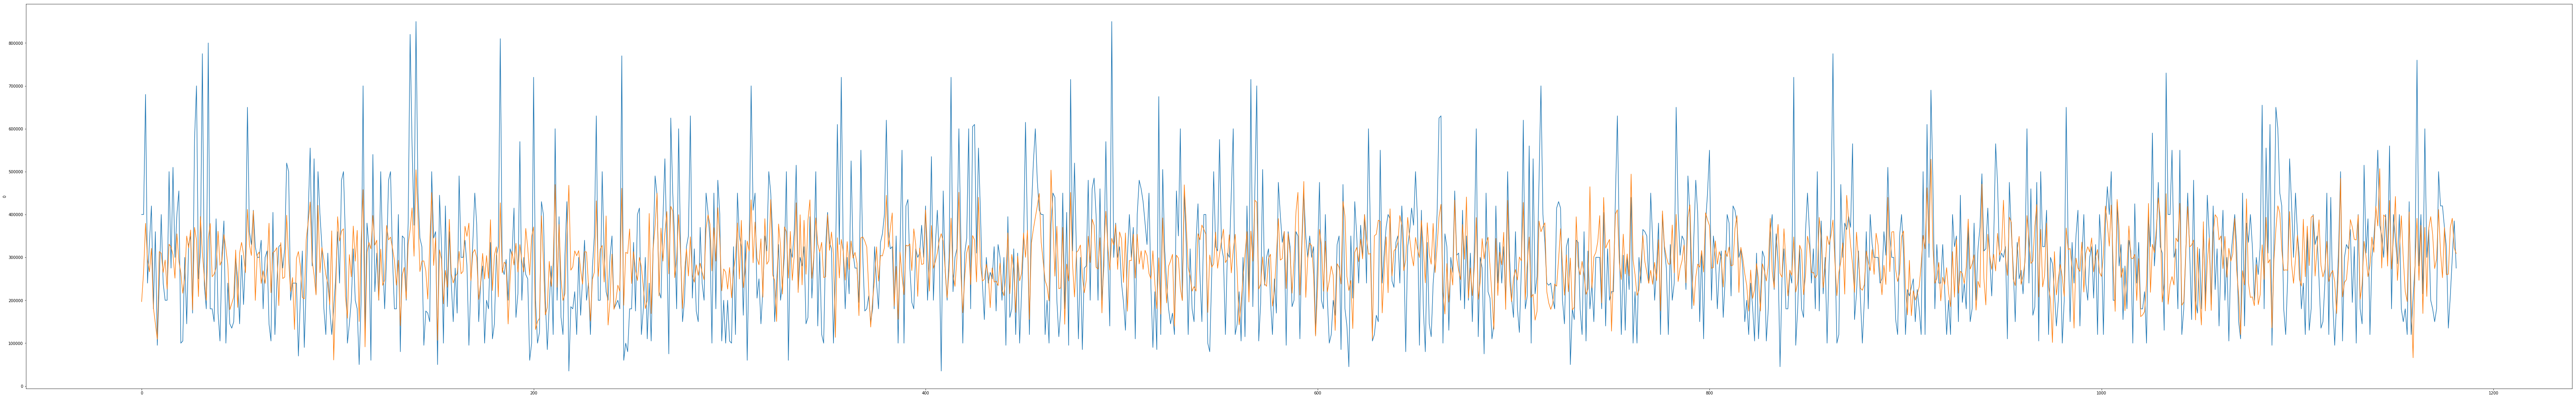

In [138]:
plt.figure(figsize=(116,18))
sns.lineplot(x = y_test.index, y = y_test['Salary'])
sns.lineplot(x = y_pred.index, y = y_pred[0])

In [178]:
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=20,criterion='mse',random_state=0)
model3 = Ridge(alpha=0.001, normalize=True)
model4 = Lasso(alpha=12,normalize=True)
rock = []
model_names = []
kf=KFold(n_splits=3,shuffle=True,random_state=0)
for model,name in zip([model1,model2,model3,model4],['Linear Regression','Random Forest','Ridge Model','Lasso Model']):
    all_rmse =[] 
    for train,test in kf.split(x,y):
        x_train,x_test=x.iloc[train,:],x.iloc[test,:]
        y_train,y_test=y.iloc[train],y.iloc[test]
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        rmse = np.sqrt(mean_squared_error(y_test,y_pred))
        all_rmse.append(rmse)
        rock.append(rmse)
    model_names.append(name)
    print('RMSE for [%s] : %.06f'% (name,np.mean(all_rmse)))

RMSE for [Linear Regression] : 118132.655538
RMSE for [Random Forest] : 122736.516676
RMSE for [Ridge Model] : 118126.859587
RMSE for [Lasso Model] : 118072.847089


### Ridge hyper parameter tuning

In [122]:
variance_error = []
bias_error = []
j = 0.001
for i in range(1,100):
    model1 = Ridge(alpha=j, normalize=True)
    kf=KFold(n_splits=3,shuffle=True,random_state=0)
    for model,name in zip([model1],['testing']):
        all_rmse=[] 
        for train,test in kf.split(x,y):
            x_train,x_test=x.iloc[train,:],x.iloc[test,:]
            y_train,y_test=y.iloc[train],y.iloc[test]
            model.fit(x_train,y_train)
            y_pred=model.predict(x_test)
            rmse = np.sqrt(mean_squared_error(y_test,y_pred))
            all_rmse.append(rmse)
            rock.append(rmse)
        model_names.append(name)
        bias_error.append(np.mean(all_rmse)),variance_error.append(np.var(all_rmse,ddof=1))
        print('RMSE scores at %f : %.06f (+/- %.06f) [%s]'% (j,np.mean(all_rmse),np.var(all_rmse,ddof=1),name))
        j = j + 0.001

RMSE scores at 0.001000 : 110451.411784 (+/- 584139.789162) [testing]
RMSE scores at 0.002000 : 110450.830822 (+/- 587892.882310) [testing]
RMSE scores at 0.003000 : 110450.752047 (+/- 591161.653976) [testing]
RMSE scores at 0.004000 : 110450.983779 (+/- 593973.642192) [testing]
RMSE scores at 0.005000 : 110451.408676 (+/- 596372.852037) [testing]
RMSE scores at 0.006000 : 110451.953722 (+/- 598406.792723) [testing]
RMSE scores at 0.007000 : 110452.573052 (+/- 600120.903523) [testing]
RMSE scores at 0.008000 : 110453.237802 (+/- 601556.393053) [testing]
RMSE scores at 0.009000 : 110453.929932 (+/- 602749.655142) [testing]
RMSE scores at 0.010000 : 110454.638384 (+/- 603732.391603) [testing]
RMSE scores at 0.011000 : 110455.356641 (+/- 604532.025316) [testing]
RMSE scores at 0.012000 : 110456.081154 (+/- 605172.204913) [testing]
RMSE scores at 0.013000 : 110456.810311 (+/- 605673.308934) [testing]
RMSE scores at 0.014000 : 110457.543753 (+/- 606052.909818) [testing]
RMSE scores at 0.015

In [117]:
graph = pd.DataFrame({'x':np.arange(0.001,0.1,0.001),'original_variance': variance_error,'original_bias':bias_error})

In [118]:
sc=StandardScaler()
graph['variance_error'] = pd.DataFrame(sc.fit_transform(graph[['original_variance']]))
graph['bias_error'] = pd.DataFrame(sc.fit_transform(graph[['original_bias']]))

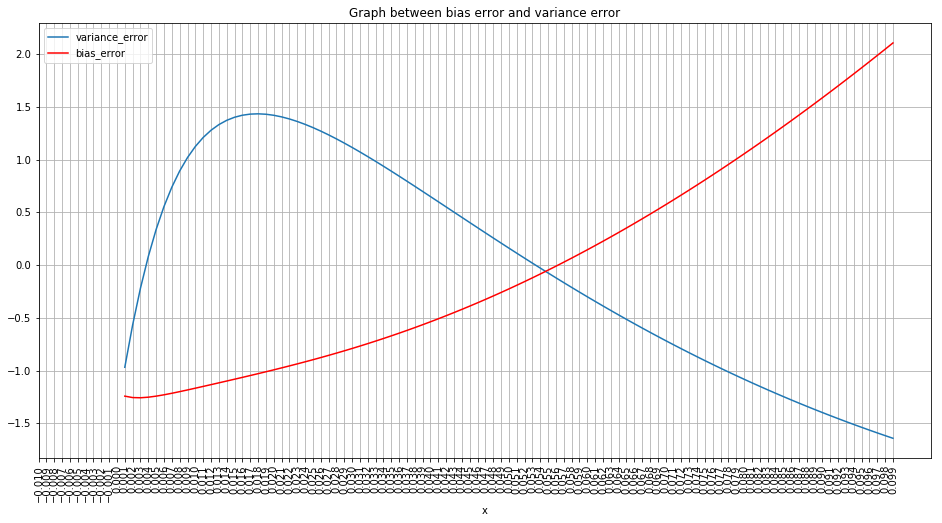

In [119]:
ax = plt.gca()
graph.plot(kind='line',x='x',y='variance_error',ax=ax,figsize=(16,8),grid=True)
graph.plot(kind='line',x='x',y='bias_error', color='red', ax=ax,figsize=(16,8),grid=True)
plt.title('Graph between bias error and variance error')
plt.xticks(np.arange(-0.01, 0.1,0.001))
plt.xticks(rotation = 90)
#plt.yticks(np.arange(-5,5,0.2))
plt.show()

In [120]:
graph

,x,original_variance,original_bias,variance_error,bias_error
0,0.001,584139.789162,110451.411784,-0.968280,-1.242042
1,0.002,587892.882310,110450.830822,-0.567464,-1.255605
2,0.003,591161.653976,110450.752047,-0.218372,-1.257444
3,0.004,593973.642192,110450.983779,0.081937,-1.252034
4,0.005,596372.852037,110451.408676,0.338163,-1.242115
5,0.006,598406.792723,110451.953722,0.555380,-1.229390
6,0.007,600120.903523,110452.573052,0.738440,-1.214932
7,0.008,601556.393053,110453.237802,0.891745,-1.199413
8,0.009,602749.655142,110453.929932,1.019180,-1.183256
9,0.010,603732.391603,110454.638384,1.124133,-1.166717


### Lasso hyper parameter tuning

In [ ]:
variance_error = []
bias_error = []
j = 0
for i in range(1,100):
    model1 = Lasso(alpha=j,normalize=True)
    kf=KFold(n_splits=3,shuffle=True,random_state=0)
    for model,name in zip([model1],['testing']):
        all_rmse=[] 
        for train,test in kf.split(x,y):
            x_train,x_test=x.iloc[train,:],x.iloc[test,:]
            y_train,y_test=y.iloc[train],y.iloc[test]
            model.fit(x_train,y_train)
            y_pred=model.predict(x_test)
            rmse = np.sqrt(mean_squared_error(y_test,y_pred))
            all_rmse.append(rmse)
            rock.append(rmse)
        model_names.append(name)
        bias_error.append(np.mean(all_rmse)),variance_error.append(np.var(all_rmse,ddof=1))
        print('RMSE scores at %0.03f : %.06f (+/- %.06f) [%s]'% (j,np.mean(all_rmse),np.var(all_rmse,ddof=1),name))
        j = j + 0.5

In [ ]:
graph = pd.DataFrame({'x':np.arange(0,j,0.5),'original_variance': variance_error,'original_bias':bias_error})
sc=StandardScaler()
graph['variance_error'] = pd.DataFrame(sc.fit_transform(graph[['original_variance']]))
graph['bias_error'] = pd.DataFrame(sc.fit_transform(graph[['original_bias']]))
ax = plt.gca()
graph.plot(kind='line',x='x',y='variance_error',ax=ax,figsize=(16,8),grid=True)
graph.plot(kind='line',x='x',y='bias_error', color='red', ax=ax,figsize=(16,8),grid=True)
plt.title('Graph between bias error and variance error')
plt.xticks(np.arange(0,50))
plt.xticks(rotation = 90)
#plt.yticks(np.arange(-5,5,0.2))
plt.show()
graph

In [ ]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
print(f'{xgb.score(x_train,y_train)} , {xgb.score(x_test,y_test)}')